In [4]:
import sqlite3
import requests
from bs4 import BeautifulSoup
import time

# データベースファイル名
db_file = "work.db"

# カテゴリごとのテーブル作成
def setup_database(categories):
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()
    for category in categories:
        table_name = category.replace("/", "_")  # テーブル名に使用できない文字を置き換え
        cursor.execute(f"""
            CREATE TABLE IF NOT EXISTS {table_name} (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                rank INTEGER,
                company TEXT,
                job_title TEXT,
                salary TEXT
            )
        """)
    conn.commit()
    conn.close()

# データをデータベースに挿入
def save_to_database(table_name, rank, company, job_title, salary):
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()
    cursor.execute(f"""
        INSERT INTO {table_name} (rank, company, job_title, salary)
        VALUES (?, ?, ?, ?)
    """, (rank, company, job_title, salary))
    conn.commit()
    conn.close()

# ランキング情報を取得してデータベースに保存
def scrape_and_save():
    base_url = "https://type.jp"
    categories = [
        ("総合", "/rank/"),
        ("開発エンジニア", "/rank/development/"),
        ("PM/PL/ITコンサル", "/rank/pm/"),
        ("インフラ系エンジニア", "/rank/infrastructure/"),
        ("その他ITエンジニア", "/rank/engineer/"),
        ("営業", "/rank/sales/"),
        ("販売・サービス", "/rank/service/"),
        ("事務", "/rank/office/"),
        ("その他の全職種", "/rank/others/")
    ]

    # データベース準備
    category_names = [cat[0] for cat in categories]
    setup_database(category_names)

    for category, path in categories:
        url = base_url + path
        table_name = category.replace("/", "_")  # テーブル名に使用できない文字を置き換え

        try:
            response = requests.get(url)
            if response.status_code != 200:
                print(f"{category} のランキング取得失敗: ステータスコード {response.status_code}")
                continue

            soup = BeautifulSoup(response.text, "html.parser")
            rankings = soup.select(".rank-ribbon")
            companies = soup.select(".mod-job-info-right .company span")
            job_titles = soup.select(".mod-job-info-right .title a")
            salaries = soup.select(".mod-job-info-right .salary")

            for i in range(min(len(rankings), len(companies), len(job_titles), len(salaries))):
                rank = rankings[i].text.strip() if rankings[i].text.strip().isdigit() else None
                company = companies[i].text.strip()
                job_title = job_titles[i].text.strip()
                salary = salaries[i].text.strip()

                save_to_database(table_name, rank, company, job_title, salary)
                print(f"Saved to {table_name}: {rank} | {company} | {job_title} | {salary}")

            time.sleep(1)  # サーバー負荷軽減のための待機時間

        except Exception as e:
            print(f"{category} のランキング取得中にエラー発生: {e}")

# 実行
if __name__ == "__main__":
    scrape_and_save()


Saved to 総合: 1 | 株式会社FEDELTA | 動画編集・Webデザイン｜未経験歓迎◆Youtubeデザイン研修◆フルリモート◆月給30万◆20代活躍◆副業可 | 350～1000万円
Saved to 総合: 2 | 株式会社ＳＤキャリアサポート | VTube制作（Live2D・VTuber）※未経験※フルリモ可※残業月3時間※制作スタジオ有＝実務多数 | 250～1000万円
Saved to 総合: 3 | ＧＭＯコネクト株式会社【東証プライム上場 GMOインターネットグループ】 | 【未経験歓迎&フルリモ可】総合職（事務・マーケ・広報・営業・人事等）年収アップ確約！年休130日以上！ | 250～750万円
Saved to 総合: 4 | 株式会社Ａｅｇｉｓ | WEBデザイナー／未経験可／最大1年の手厚い研修／フルリモート可／完全週休2日／年休122日以上／残業少 | 300～1000万円
Saved to 総合: 5 | 株式会社Ａｎｔｒａｃｅ | 動画編集*フルリモートOK*未経験歓迎*髪型*服装自由*寮完備 | 300～700万円
Saved to 総合: 6 | 日本マイクロソフト株式会社【ポジションマッチ登録】 | オープンポジション | -
Saved to 総合: 7 | サイボウズ株式会社 | 総合職/営業・企画系*福利厚生充実*時短・在宅など選べる働き方*賞与年2回 | 450～850万円
Saved to 総合: 8 | 亀田製菓株式会社【ポジションマッチ登録】 | オープンポジション | -
Saved to 総合: 9 | 株式会社Euphonauts | ITオフィスサポート*リモート率80%*未経験歓迎♪  年間休日130日*残業月平均3.6時間服装・髪型自由 | 250～1400万円
Saved to 総合: 10 | 株式会社トライ | ITオフィスサポート*未経験OK♪ *年間休日130日*リモート8割*残業月3.6h*服装・髪型自由 | 300～1100万円
Saved to 総合: 11 | ゼロプライド株式会社 | Web系総合職（動画編集/アプリ制作など）◆未経験OK◆フルリモートも可◆残業月10H以下◆平均年齢26歳 | 350～600万円
Saved to 総合: 12 | 株式会社ＬＩＦＦＩ

分析

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

分析中のテーブル: 総合
総合 の平均年収: 265.00 万円
総合 の100万円以上の給料を提示する会社数: 17


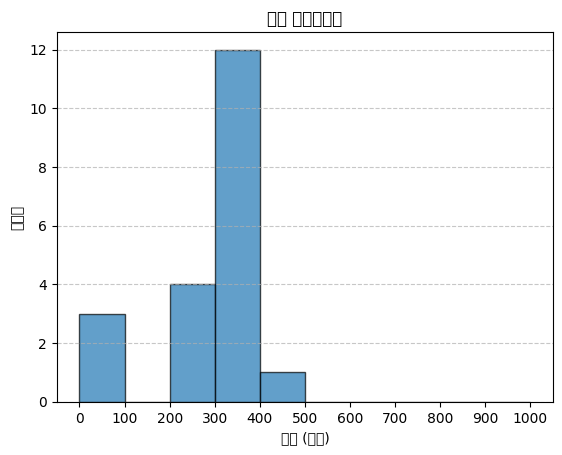

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

分析中のテーブル: 開発エンジニア
開発エンジニア の平均年収: 270.00 万円
開発エンジニア の100万円以上の給料を提示する会社数: 16


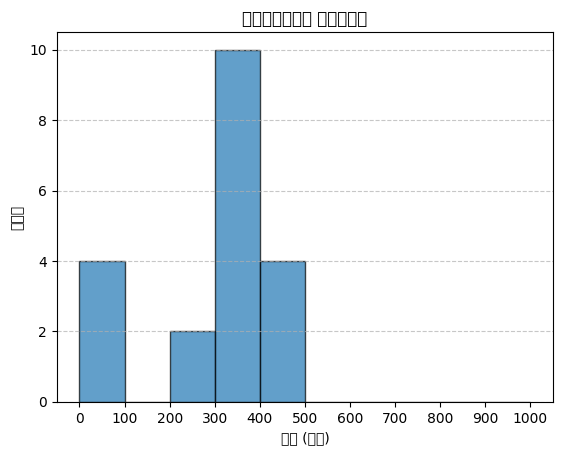

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.


分析中のテーブル: PM_PL_ITコンサル
PM_PL_ITコンサル の平均年収: 457.50 万円
PM_PL_ITコンサル の100万円以上の給料を提示する会社数: 18


findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

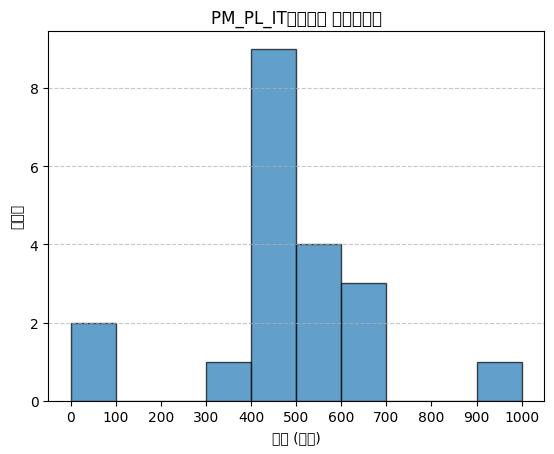

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

分析中のテーブル: インフラ系エンジニア
インフラ系エンジニア の平均年収: 347.50 万円
インフラ系エンジニア の100万円以上の給料を提示する会社数: 19


findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

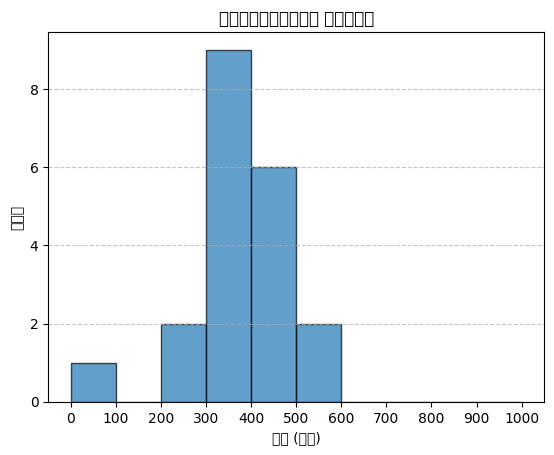

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

分析中のテーブル: その他ITエンジニア
その他ITエンジニア の平均年収: 342.50 万円
その他ITエンジニア の100万円以上の給料を提示する会社数: 19


findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

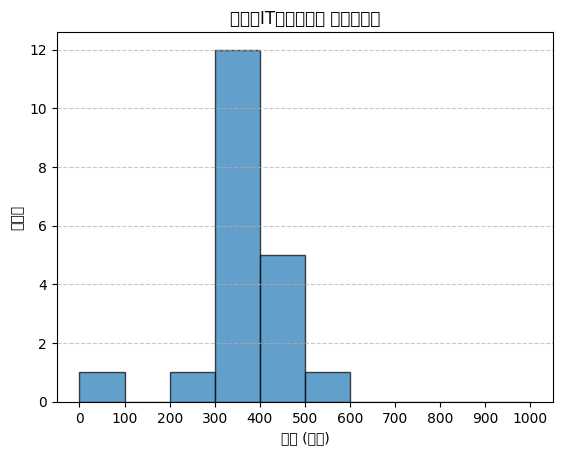

findfont: Font family 'IPAexGothic' not found.


分析中のテーブル: 営業
営業 の平均年収: 312.50 万円
営業 の100万円以上の給料を提示する会社数: 16


findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

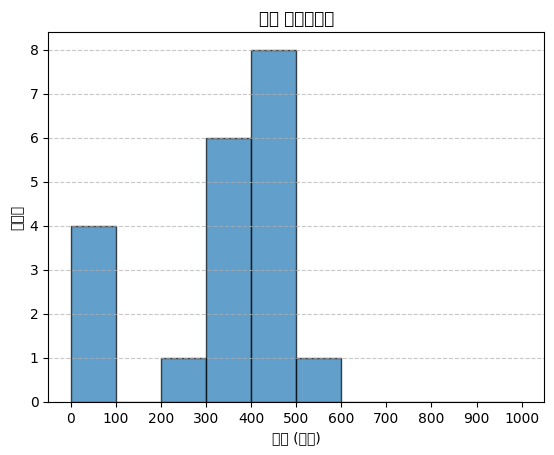

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

分析中のテーブル: 販売・サービス
販売・サービス の平均年収: 330.00 万円
販売・サービス の100万円以上の給料を提示する会社数: 20


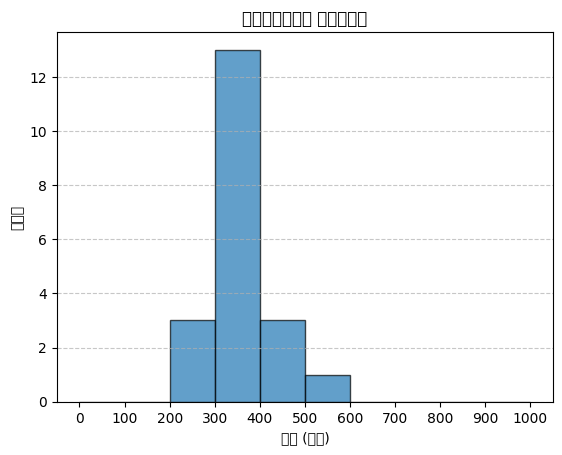

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.


分析中のテーブル: 事務
事務 の平均年収: 305.00 万円
事務 の100万円以上の給料を提示する会社数: 18


findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

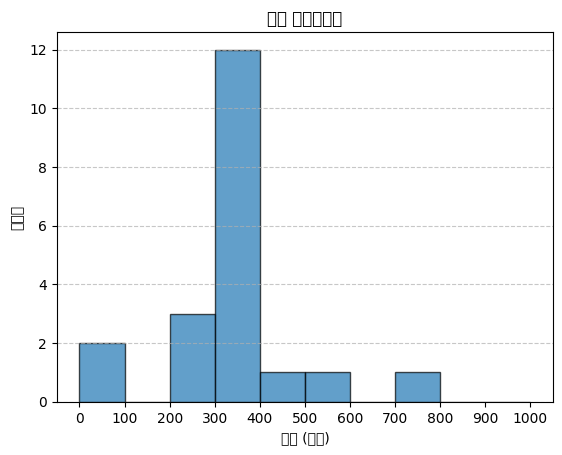

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

分析中のテーブル: その他の全職種
その他の全職種 の平均年収: 297.50 万円
その他の全職種 の100万円以上の給料を提示する会社数: 18


findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

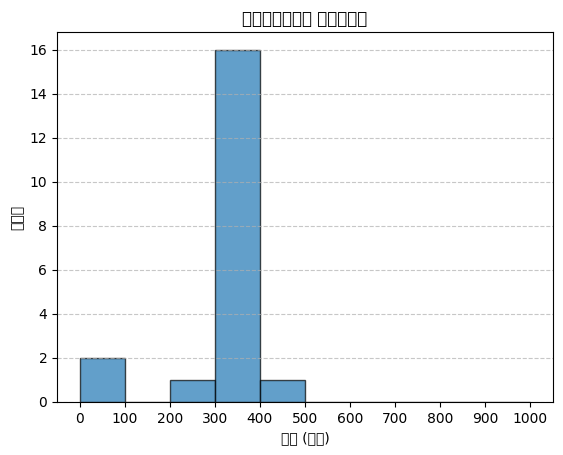

In [55]:
import sqlite3
import re
import numpy as np
import matplotlib.pyplot as plt

# データベースファイル名
db_file = "work.db"

def parse_salary(salary_text):
    """
    給料テキストを数値に変換する関数。
    - 範囲指定（例: "350~700" や "350-700"）は中央値を返す。
    - "万円" や空白を含む場合は除去して処理。
    - 数値以外や無効な場合は 0 を返す。
    """
    if not salary_text:
        return 0

    # 範囲指定の場合
    match = re.match(r"(\d+)[~-](\d+)", salary_text)
    if match:
        low, high = map(int, match.groups())
        return (low + high) // 2

    # 単一の数値の場合
    match = re.match(r"(\d+)", salary_text)
    if match:
        return int(match.group(1))

    # 無効な場合
    return 0

def analyze_salary_data():
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()
    
    # テーブル一覧を取得 (sqlite_sequence を除外)
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
    tables = [row[0] for row in cursor.fetchall() if row[0] != "sqlite_sequence"]
    
    for table in tables:
        print(f"分析中のテーブル: {table}")
        
        # テーブル内の salary カラムを取得
        try:
            cursor.execute(f"SELECT salary FROM {table}")
            salaries = cursor.fetchall()
        except sqlite3.OperationalError as e:
            print(f"{table} のデータ取得中にエラー発生: {e}")
            continue
        
        # 年収を数値に変換
        salary_values = [parse_salary(salary[0]) for salary in salaries]
        
        # 平均値の計算
        if salary_values:
            avg_salary = np.mean(salary_values)
            print(f"{table} の平均年収: {avg_salary:.2f} 万円")

        # 年収が100万円以上の会社数を計算
        above_100 = sum(1 for salary in salary_values if salary >= 100)
        print(f"{table} の100万円以上の給料を提示する会社数: {above_100}")

        # グラフのプロット
        salary_bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
        plt.hist(salary_values, bins=salary_bins, edgecolor='black', alpha=0.7)
        plt.title(f"{table} の年収分布")
        plt.xlabel("年収 (万円)")
        plt.ylabel("会社数")
        plt.xticks(salary_bins)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

    conn.close()

# 実行
if __name__ == "__main__":
    analyze_salary_data()